# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [115]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [35]:
# Your code here
df = pd.read_csv('data/ames.csv',index_col = 0)

The following code checks that you loaded the data correctly:

In [36]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [37]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [38]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [52]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [73]:
import numpy as np

min_sale_price = 30000
max_sale_price = 800000
N = len(df['SalePrice'])  # Number of data points

# Calculate range and standard deviation
range_sale_price = max_sale_price - min_sale_price
std_sale_price = np.std(df['SalePrice'])

# Scott's rule
bin_width_scott = 3.5 * std_sale_price / np.power(N, 1/3)
bins_scott = range_sale_price / bin_width_scott
print("Number of bins (Scott's rule):", int(bins_scott))

Number of bins (Scott's rule): 31


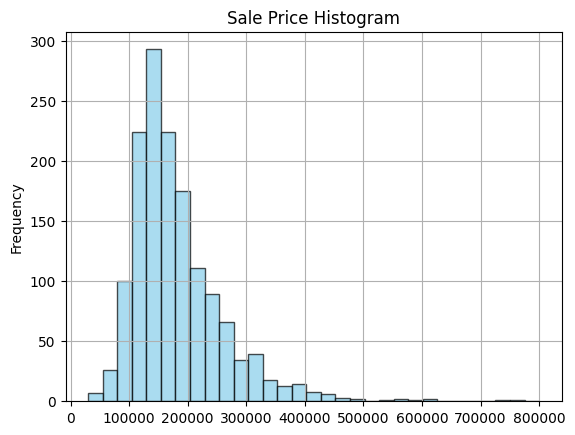

In [90]:
# Your code here
min_sale_price = 30000
max_sale_price = 800000
plt.hist(df['SalePrice'], bins=31, range=(min_sale_price, max_sale_price), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sale Price Histogram')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Now, print out the mean, median, and standard deviation:

In [58]:
# Your code here
# Calculate mean
mean_sale_price = df['SalePrice'].mean()

# Calculate median
median_sale_price = df['SalePrice'].median()

# Calculate standard deviation
std_sale_price = df['SalePrice'].std()

# Print the results
print("Mean Sale Price:", mean_sale_price )
print("Median Sale Price:", median_sale_price )
print("Standard Deviation of Sale Price:", std_sale_price )


Mean Sale Price: 180921.19589041095
Median Sale Price: 163000.0
Standard Deviation of Sale Price: 79442.50288288662


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
    Mean Sale Price: The mean sale price is approximately 180,921.20. This value represents the average sale price across all properties in the dataset.

    Median Sale Price: The median sale price is 163,000.00. The median represents the middle value when all sale prices are arranged in ascending order. It indicates that half of the properties in the dataset were sold at a price lower than $163,000.00, and the other half were sold at a price higher than $163,000.00.

    Standard Deviation of Sale Price: The standard deviation of sale prices is approximately 79,442.50. This value measures the dispersion or spread of sale prices around the mean. A higher standard deviation indicates greater variability in sale prices from the mean. In this case, the relatively large standard deviation suggests that sale prices vary considerably from the average sale price.
"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

In [80]:
print(df['TotRmsAbvGrd'].max())
print(df['TotRmsAbvGrd'].min())


14
2


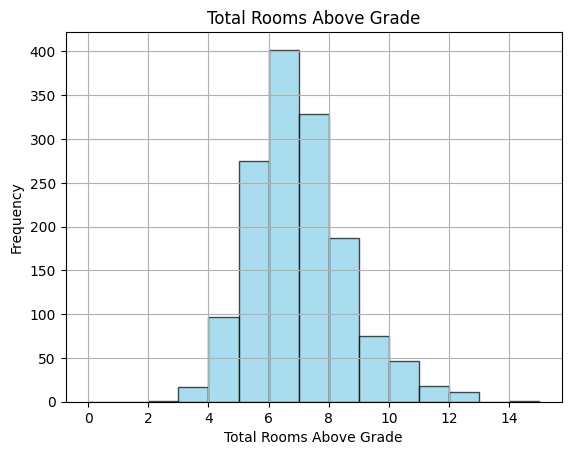

In [88]:
# Your code here
max_tot_rooms_above_grade = 15
min_tot_rooms_above_grade = 0

plt.hist(df['TotRmsAbvGrd'],bins = 15, range = (min_tot_rooms_above_grade,max_tot_rooms_above_grade) ,edgecolor = 'black', color ='skyblue',alpha=0.7)
plt.title('Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Now, print out the mean, median, and standard deviation:

In [34]:
# Your code here
# Calculate mean
mean_tot_rooms = df['TotRmsAbvGrd'].mean()

# Calculate median
median_tot_rooms = df['TotRmsAbvGrd'].median()

# Calculate standard deviation
std_tot_rooms = df['TotRmsAbvGrd'].std()

# Print the results
print("Mean Total Rooms Above Grade:", mean_tot_rooms)
print("Median Total Rooms Above Grade:", median_tot_rooms)
print("Standard Deviation of Total Rooms Above Grade:", std_tot_rooms)

Mean Total Rooms Above Grade: 6.517808219178082
Median Total Rooms Above Grade: 6.0
Standard Deviation of Total Rooms Above Grade: 1.6253932905840505


In the cell below, interpret the above information.

In [41]:
# Replace None with appropriate text
"""
The mean total rooms above grade is approximately 6.52, indicating that on average, houses in the dataset have around 6.5 rooms above grade.
The median total rooms above grade is 6.0, which means that half of the houses have 6 or fewer rooms above grade, and the other half have 7 or more rooms above grade.
The standard deviation of total rooms above grade is approximately 1.63. This value represents the dispersion or spread of the total rooms above grade values around the mean. Since the standard deviation is relatively small compared to the mean, it suggests that the distribution of total rooms above grade is not highly spread out,
and most of the values are relatively close to the mean.
"""

'\nThe mean total rooms above grade is approximately 6.52, indicating that on average, houses in the dataset have around 6.5 rooms above grade.\nThe median total rooms above grade is 6.0, which means that half of the houses have 6 or fewer rooms above grade, and the other half have 7 or more rooms above grade.\nThe standard deviation of total rooms above grade is approximately 1.63. This value represents the dispersion or spread of the total rooms above grade values around the mean. Since the standard deviation is relatively small compared to the mean, it suggests that the distribution of total rooms above grade is not highly spread out,\nand most of the values are relatively close to the mean.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [82]:
print(df['OverallCond'].max())
print(df['OverallCond'].min())

9
1


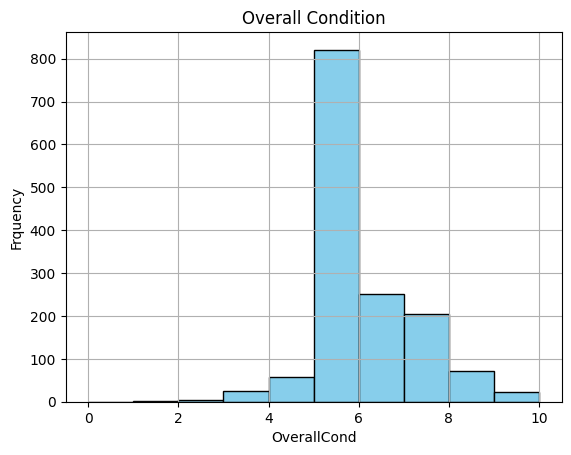

In [87]:
# Your code here

plt.hist(df['OverallCond'],bins = 10, range =(0,10) , edgecolor = 'black', color ='skyblue')
plt.title('Overall Condition')
plt.xlabel('OverallCond')
plt.ylabel('Frquency')
plt.grid(True)
plt.show()

Now, print out the mean, median, and standard deviation:

In [43]:
# Your code here
# Calculate mean
mean_overall_cond = df['OverallCond'].mean()

# Calculate median
median_overall_cond = df['OverallCond'].median()

# Calculate standard deviation
std_overall_cond = df['OverallCond'].std()

# Print the results
print("Mean:", mean_overall_cond)
print("Median: ", median_overall_cond)
print("Standard Deviation:", std_overall_cond)

Mean: 5.575342465753424
Median:  5.0
Standard Deviation: 1.1127993367127316


In the cell below, interpret the above information.

In [44]:
# Replace None with appropriate text
"""
The mean overall condition of houses in the dataset is approximately 5.58. This suggests that, on average, the overall condition of houses tends to be slightly above average.

The median overall condition is 5.0, indicating that half of the houses have an overall condition score of 5 or lower, and the other half have a score of 5 or higher.

The standard deviation of the overall condition is approximately 1.11. This value represents the dispersion or spread of the overall condition scores around the mean. Since the standard deviation is relatively small compared to the mean, it suggests that the distribution of overall condition scores is not highly spread out, and most of the values are relatively close to the mean.
"""

'\nThe mean overall condition of houses in the dataset is approximately 5.58. This suggests that, on average, the overall condition of houses tends to be slightly above average.\n\nThe median overall condition is 5.0, indicating that half of the houses have an overall condition score of 5 or lower, and the other half have a score of 5 or higher.\n\nThe standard deviation of the overall condition is approximately 1.11. This value represents the dispersion or spread of the overall condition scores around the mean. Since the standard deviation is relatively small compared to the mean, it suggests that the distribution of overall condition scores is not highly spread out, and most of the values are relatively close to the mean.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [94]:
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [102]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond'] < 5]
average_condition = df.loc[df['OverallCond'] == 5]
above_average_condition =df.loc[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [103]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

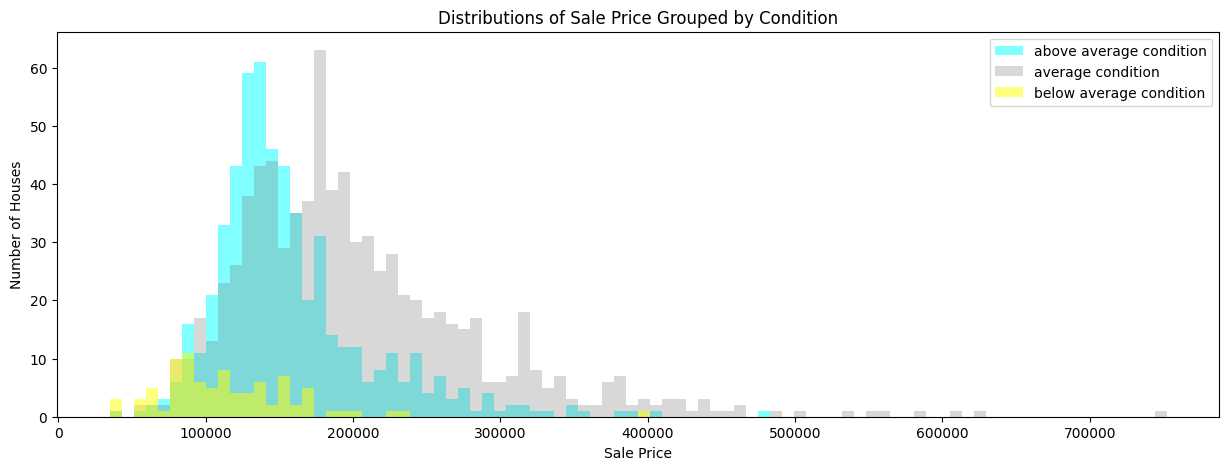

In [104]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [105]:
# Replace None with appropriate text
"""
Majority of the houses are in average condition. Then followed by below average and lastly above average condition.
Houses in above average condition tend to have higher sale prices compared to those in average or below average condition.
There is some overlap between the distributions, indicating that there are instances where houses in below average condition may have similar sale prices
to those in average or above average condition.
It's interesting to note that while there is a general trend of higher sale prices for houses in better condition, there are still houses in below average condition that command relatively high prices, potentially due
to other factors such as location, size, or unique features.
"""

"\nMajority of the houses are in average condition. Then followed by below average and lastly above average condition.\nHouses in above average condition tend to have higher sale prices compared to those in average or below average condition.\nThere is some overlap between the distributions, indicating that there are instances where houses in below average condition may have similar sale prices\nto those in average or above average condition.\nIt's interesting to note that while there is a general trend of higher sale prices for houses in better condition, there are still houses in below average condition that command relatively high prices, potentially due\nto other factors such as location, size, or unique features.\n"

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [122]:
# Your code here
#Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64','int64'])

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Extract the correlation values for SalePrice
saleprice_corr = correlation_matrix['SalePrice']

# Find the column with the highest positive correlation (excluding SalePrice itself)
most_pos_corr_col = saleprice_corr[saleprice_corr.index != 'SalePrice'].idxmax()
most_pos_corr_value = saleprice_corr[most_pos_corr_col]

# Print the result
print(f"The column most positively correlated with SalePrice is: {most_pos_corr_col}")
print(f"The Pearson correlation value is: {most_pos_corr_value}")


The column most positively correlated with SalePrice is: OverallQual
The Pearson correlation value is: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [123]:
# Your code 
#Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64','int64'])

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Extract the correlation values for SalePrice
saleprice_corr = correlation_matrix['SalePrice']

# Find the column with the highest negative correlation (excluding SalePrice itself)
most_neg_corr_col = saleprice_corr[saleprice_corr.index != 'SalePrice'].idxmin()
most_neg_corr_value = saleprice_corr[most_neg_corr_col]

# Print the result
print(f"The column most negatively correlated with SalePrice is: {most_neg_corr_col}")
print(f"The Pearson correlation value is: {most_neg_corr_value}")

The column most negatively correlated with SalePrice is: KitchenAbvGr
The Pearson correlation value is: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

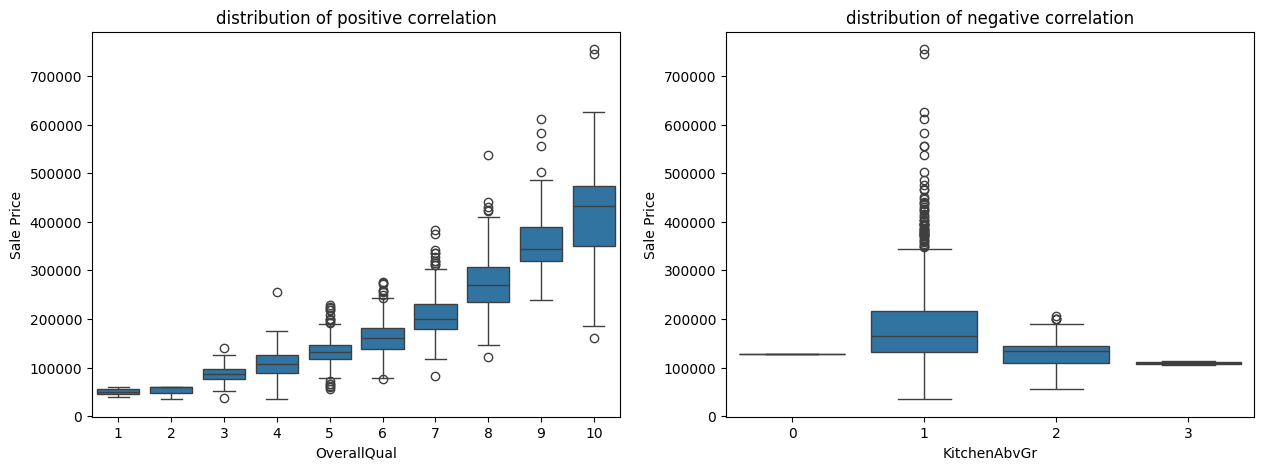

In [125]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('distribution of positive correlation' )
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title('distribution of negative correlation')
ax2.set_xlabel('KitchenAbvGr')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
    Highest Positive Correlation: OverallQual shows that better quality significantly increases house prices.
    Highest Negative Correlation: KitchenAbvGr indicates that standard single-kitchen configurations are most valued, and deviations may reduce house prices.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [126]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

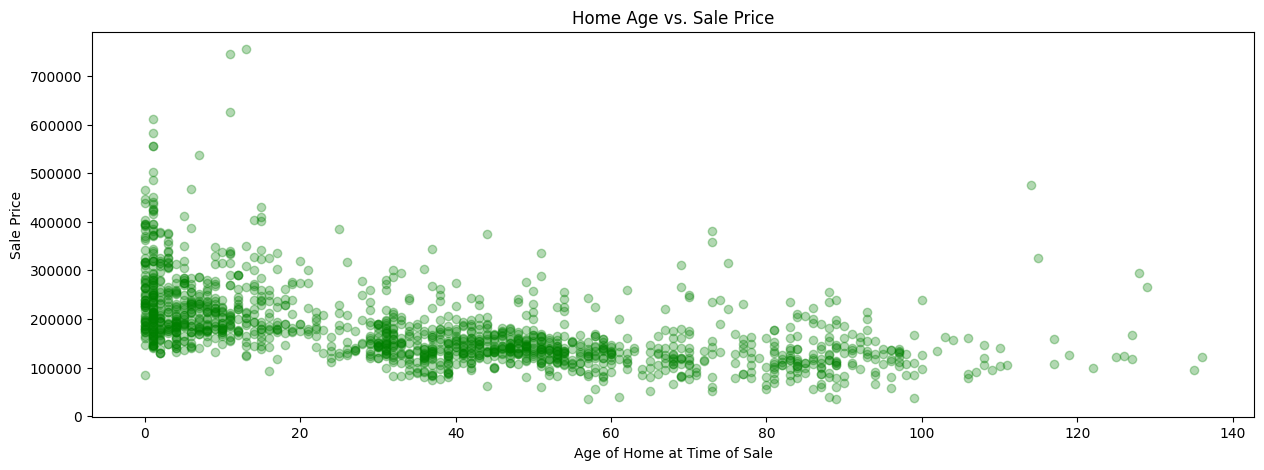

In [127]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
None
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.